# Lab #1 Intro to numpy and Data Analysis

This aim of this lab is to get you aquainted to very important python modules (libraries):
- numpy
- pandas
- matplotlib

Other modules in this jupyter notebook are **prohibited**, unless it is stated otherwise.

#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible.

#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url. 

#### How to submit
- Name your file according to this convention: `lab01_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an email with topic `lab01_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`

## Part 1. Numpy [7 points]

In this part you must not use loops (`for`, `while`) and `map` function. For every implemented function provide some usage example (you may use randomly sampled matrices). Pay attention to types of input variables

In [38]:
import numpy as np

**Task 1. [0.5 point]** Implement a function that takes two matrices as input, flattens them and returns a one-dimensional array where elements of these matrices alternate. 

For example, `(np.array([[1,2,3], [4,5,6]]), np.array([[7,8],[9,10]])) -> [1,7,2,8,3,9,4,10,5,6]`.

In [39]:
def flatten_merge(arr_a, arr_b):
    assert isinstance(arr_a, np.ndarray) and isinstance(arr_b, np.ndarray)
    a, b = arr_a.flatten(), arr_b.flatten()
    if len(a) < len(b):
        c, b = b[len(a)::], b[:len(a):]
    elif len(a) > len(b):
        c, a = a[len(b)::], a[:len(b):]     
    d = np.dstack((a, b)).flatten()
    return np.concatenate((d,c))
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8],[9,10]])
flatten_merge(a,b)

array([ 1,  7,  2,  8,  3,  9,  4, 10,  5,  6])

**Task 2. [0.5 point]** Implement a function to calculate the product of non-zero elements of array. For example, for `np.array([1,2,0,6])` the answer is 12. 

If there are no non-zero elements, the function must return `nan`.

In [40]:
def product_non_zero(arr):
    assert isinstance(arr, np.ndarray)
    return np.prod(arr[np.where(arr!=0)])
product_non_zero(np.array([1,2,0,6,-1]))

-12

**Task 3. [1 point]** Normalize every column of the input matrix: subtract the mean and divide by the std (avoid division by zero)

In [41]:
def vertical_scale(arr):
    assert isinstance(arr, np.ndarray)
    if 0 in np.std(arr,0):
        return 'Стандартное отклонение 0'
    else: 
        return (arr - np.mean(arr,0))/np.std(arr,0)
vertical_scale(np.array([[1,1,1],[1,8,9]]))
vertical_scale(np.array([[5,1,1],[1,8,9]]))

array([[ 1., -1., -1.],
       [-1.,  1.,  1.]])

**Task 4. [0.5 points]** Implement a function that returns transposed matrix, without changing given.

In [42]:
def safe_transpose(arr):
    assert isinstance(arr, np.ndarray)
    return arr.transpose()
safe_transpose(np.array([[1, 1], [2, 2], [3, 3]]))

array([[1, 2, 3],
       [1, 2, 3]])

**Task 5. [0.5]** Implement a funtion that returns index of max element in the matrix.

In [43]:
def max_elem_index(arr):
    assert isinstance(arr, np.ndarray)
    return np.unravel_index(arr.argmax(), arr.shape)
max_elem_index(np.array([[3,2,6],[1,8,9]]))

(1, 2)

**Task 6. [1 points]** Implement a function that will take a matrix and insert a zeros between every column and row. 

Example: `[[1, 2], [3, 4]] -> [[1, 0, 2], [0, 0, 0], [3, 0, 4]]`

In [44]:
def insert_zeros(arr):
    assert isinstance(arr, np.ndarray)
    brr = np.zeros((len(arr)*2-1, len(arr[0])*2-1))
    brr[::2,::2] = arr
    return brr 
insert_zeros(np.array([[1, 2], [3, 4]]))

array([[1., 0., 2.],
       [0., 0., 0.],
       [3., 0., 4.]])

**Task 7. [0.5 points]** Implement a function that returns those columns of matrix that have count of elements greater than `k` is greater than count of elements smaller than `k`. 

For example, `([[1,2],[3,4]], 2) -> [[2], [4]]`.

In [45]:
def k_columns(arr, k):
    assert isinstance(arr, np.ndarray)
    c = np.sign(np.sum(np.sign(arr-k),axis=0))
    arr = arr.transpose()
    return arr[np.where(c>0)]
k_columns(np.array([[1,2],[3,4]]), 2)

array([[2, 4]])

**Task 8. [0.5 points]** Implement a function that an integer matrix and an integer as input. It multiplies each element of the matrix by minimal factor that this element becomes divisible by the given number. 

For example, `([[5, 4, 36, 8]], 12) -> [[60, 12, 36, 24]]`.

In [46]:
def make_divisible(arr, k):
    assert isinstance(arr, np.ndarray)
    assert isinstance(k, int)
    return np.lcm(arr,12)
make_divisible(np.array([[5, 4, 36, 8]]),12)

array([[60, 12, 36, 24]])

**Task 9. [0.5 points]** Given a matrix, implement a function that transforms all elements greater than `a_max` into `a_max`. And all elements that are smaller that `a_min` into `a_min`.

In [47]:
def min_max_crop(arr, a_min, a_max):
    assert isinstance(arr, np.ndarray)
    arr[np.where(arr>a_max)] = a_max 
    arr[np.where(arr<a_min)] = a_min
    return arr
a = np.random.randint(15,size=(5,3))
print(a,'\n')
min_max_crop(a, 2, 10)

[[13  3  5]
 [13  0 14]
 [ 6 11  7]
 [14  1 12]
 [ 0  5  1]] 



array([[10,  3,  5],
       [10,  2, 10],
       [ 6, 10,  7],
       [10,  2, 10],
       [ 2,  5,  2]])

**Task 10. [0.5 points]** Implement a function that replaces nan elements with the mean of all non-nan elements. In case if all elements are nan the function does nothing.

In [48]:
def replace_nans(arr):
    assert isinstance(arr, np.ndarray)
    if not(np.all(np.isnan(arr))):
        arr[np.where(np.isnan(a))] = np.nanmean(arr)
        return arr
    else:
        return 'All nan'
a = np.arange(12.).reshape(3,4)
a.ravel()[[2,5,7]] = np.nan
print(a)
print(replace_nans(a))
a[::] = np.nan #все nan
print('\n',a)
print(replace_nans(a))

[[ 0.  1. nan  3.]
 [ 4. nan  6. nan]
 [ 8.  9. 10. 11.]]
[[ 0.          1.          5.77777778  3.        ]
 [ 4.          5.77777778  6.          5.77777778]
 [ 8.          9.         10.         11.        ]]

 [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
All nan


**Task 11. [0.5 points]** Implement a function that calculates:

- determinant
- trace
- eigenvalues
- Frobenius norm
- inverse matrix

of a matrix given

In [49]:
def matrix_stats(arr):
    assert isinstance(arr, np.ndarray)
    print('det = ',           np.linalg.det(arr),
          '\ntrace = ',       np.trace(arr), 
          '\neigenvalues =\n',np.linalg.eig(arr), 
          '\nF_norm = ',      np.linalg.norm(arr), 
          '\ninverse = \n',   np.linalg.inv(arr))
a = np.random.randint(10,size=(2,2))
print(a)
matrix_stats(a)

[[2 7]
 [3 7]]
det =  -7.000000000000003 
trace =  9 
eigenvalues =
 (array([-0.72015325,  9.72015325]), array([[-0.9320977 , -0.67170966],
       [ 0.36220694, -0.7408145 ]])) 
F_norm =  10.535653752852738 
inverse = 
 [[-1.          1.        ]
 [ 0.42857143 -0.28571429]]


**Task 12. [0.5 points]** Implement a function that takes two lists of same length `N`, constructs a `N` by 3 matrix. First two columns are the elements of input lists and  values in the third column are the result of bitwise xor of elements of the same row.

In [50]:
def construct_xor_matrix(list_a, list_b):
    assert isinstance(list_a, list)
    assert isinstance(list_b, list)
    arr_a = np.array(list_a)
    arr_b = np.array(list_b)
    return np.array([arr_a,arr_b,arr_a^arr_b]).transpose()
a = list(np.random.randint(10,size=(5)))
b = list(np.random.randint(10,size=(5)))
print(a,'\n', b)
print(construct_xor_matrix(a, b))

[8, 8, 9, 6, 5] 
 [0, 2, 8, 0, 3]
[[ 8  0  8]
 [ 8  2 10]
 [ 9  8  1]
 [ 6  0  6]
 [ 5  3  6]]


# Part 2. Dataset analysis [8 points]


In this part we are going to analyze the "Titanic dataset".
The main goal of this task is to describe the data.

Here are some tips:
- use plots
- notice pecualrities in the data
- present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These  tasks involve `numpy`, `pandas` and `matplotlib` - very common python modules. In one task you may use `scipy`.

#### Input data
This task uses 2 files:
- `passengers_record.csv` contains some general information on passengers (name, class, age, etc.)
- `survival_info.csv` contains binary labels whether passenger survived or not

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1. [1 point]**

Read these files and join them into single dataset (use `passenger_id` as join key). Then provide some description of the dataset: 
- What are age/gender/class distributions and their averages? How many people belong to each group?
- Find the oldest/youngest passangers in every class
- Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [52]:
passengers_record = pd.read_csv('passengers_record.csv', sep=',')
survival_info = pd.read_csv('survival_info.csv', sep=',')
assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"

Прочитано записей -  891


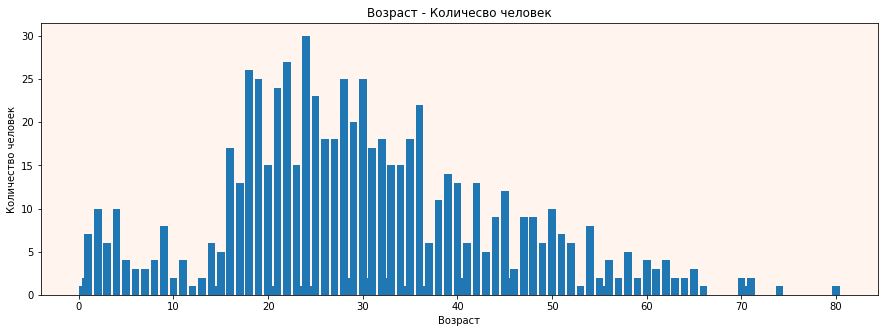

Средний возраст =  29.69911764705882

Пол:	Количесво человек
female	314
male	577


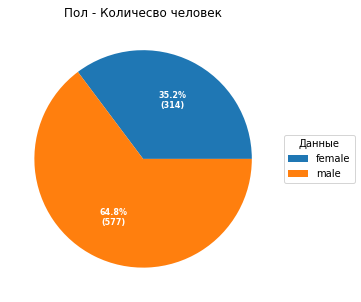


Класс	Количесво человек
1	216
2	184
3	491


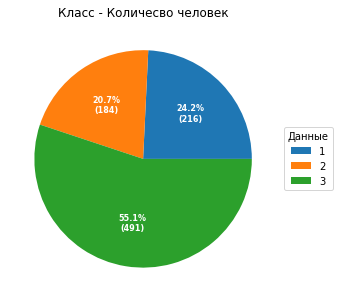

 Barkworth, Mr. Algernon Henry Wilson самый старший пассажир в 1 классе( 80.0 лет)
 Allison, Master. Hudson Trevor самый молодой пассажир в 1 классе ( 0.92 лет)
 Mitchell, Mr. Henry Michael самый старший пассажир в 2 классе( 70.0 лет)
 Hamalainen, Master. Viljo самый молодой пассажир в 2 классе ( 0.67 лет)
 Svensson, Mr. Johan самый старший пассажир в 3 классе( 74.0 лет)
 Thomas, Master. Assad Alexander самый молодой пассажир в 3 классе ( 0.42 лет)

В 1 классе выжило 136 пассажиров из 216 что составляет 62.96296296296296 %
В 2 классе выжило 87 пассажиров из 184 что составляет 47.28260869565217 %
В 3 классе выжило 119 пассажиров из 491 что составляет 24.236252545824847 %

В возрасте от 0 до 10 лет выжило 38 пассажиров из 62 что составляет 61.29032258064516 %
В возрасте от 10 до 15 лет выжило 7 пассажиров из 16 что составляет 43.75 %
В возрасте от 15 до 30 лет выжило 111 пассажиров из 306 что составляет 36.27450980392157 %
В возрасте от 30 до 50 лет выжило 107 пассажиров из 256 что соста

In [53]:
df = passengers_record.merge(survival_info)
print('Прочитано записей - ', len(df))

def Age(df):
    age = []
    age.extend(list(set(df.Age[np.isnan(df['Age'])==False])))
    age.sort()
    age_k = []
    for i in age:
        age_k.append(len(df[df['Age']==i]))
    return age, age_k, df.Age.mean()  

def Subplots(name, name_x, name_y, x, y, width = 15, height = 5)  :
    fig, ax = plt.subplots()
    ax.set_title(name)    
    ax.set_xlabel(name_x)
    ax.set_ylabel(name_y) 
    ax.bar(x, y)
    ax.set_facecolor('seashell')
    fig.set_figwidth(width)          # ширина
    fig.set_figheight(height)        # высота
    plt.show()

age, age_k, sred = Age(df)
Subplots('Возраст - Количесво человек', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст = ', sred)
#----------------------------------------------------------------------------------------------------------
def Sex(df):
    sex = list(set(df.Sex))
    sex_k = []
    for i in sex:
        sex_k.append(len(df[df['Sex']==i]))
    return sex, sex_k

def Pie(name, name_data, data, size = 5):
    fig, ax = plt.subplots(figsize=(size, size), subplot_kw=dict(aspect="equal"))
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    wedges, texts, autotexts = ax.pie(data, autopct =  lambda pct: func(pct, data), textprops = dict(color="w"))
    ax.legend(wedges, name_data, title="Данные", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(name)
    plt.show()

sex, sex_k = Sex(df)
print('\nПол:\tКоличесво человек')
[print(sex[i],sex_k[i],sep='\t') for i in range(len(sex))]
Pie('Пол - Количесво человек', sex, sex_k)
#----------------------------------------------------------------------------------------------------------
def Pclass(df):
    pclass = list(set(df.Pclass))
    pclass_k = []
    for i in pclass:
        pclass_k.append(len(df[df['Pclass']==i]))
    return pclass, pclass_k

pclass, pclass_k = Pclass(df)
print('\nКласс\tКоличесво человек')
[print(pclass[i], pclass_k[i], sep='\t') for i in range(len(pclass))]
Pie('Класс - Количесво человек', pclass, pclass_k)    
#-----------------------------------------------------------------------------------------------------------
def max_min_age(df):
    pclass, pclass_k = Pclass(df)
    for i in pclass:
        max_age = df.Age[df['Pclass']==i].max()
        print(df.Name[(df['Pclass']==i) & (df.Age == max_age)].to_string(index=False),
              'самый старший пассажир в', i, 'классе(',max_age,'лет)')
        min_age = df.Age[df['Pclass']==i].min()
        print(df.Name[(df['Pclass']==i) & (df.Age == min_age)].to_string(index=False),
              'самый молодой пассажир в', i, 'классе (',min_age,'лет)')
max_min_age(df)        
#-----------------------------------------------------------------------------------------------------------
def Survived(df, age_intervals = [0,10,15,30,50,65,80]):
    pclass, pclass_k = Pclass(df)
    for i in pclass:
        alive_pass = len(df[(df['Pclass']==i) & (df['Survived']==1)])
        all_pass   = len(df[(df['Pclass']==i)])
        print('В', i, 'классе выжило', alive_pass, 'пассажиров из', all_pass, 
              'что составляет', alive_pass/all_pass*100,'%')
    print()
    for i in range(len(age_intervals)-1):
        alive_pass = len(df[ (df['Age']>=age_intervals[i]) & (df['Age']<age_intervals[i+1]) & (df['Survived']==1)])
        all_pass   = len(df[ (df['Age']>=age_intervals[i]) & (df['Age']<age_intervals[i+1])])
        print('В возрасте от', age_intervals[i], 'до', age_intervals[i+1], 'лет выжило', alive_pass,
              'пассажиров из', all_pass, 'что составляет', alive_pass/all_pass*100,'%')
    print()
    for i in sex:
        alive_pass = len(df[(df['Sex']==i) & (df['Survived']==1)])
        all_pass   = len(df[(df['Sex']==i)])
        print('Выжило', alive_pass, i, 'из', all_pass, 'что составляет', alive_pass/all_pass*100,'%')
print()
Survived(df)
#-----------------------------------------------------------------------------------------------------------

**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point. 

Can we answer this question using the T-test? Why? Here you may use `scipy.stats`.

В 1 классе средний возраст составляет 38.233440860215055


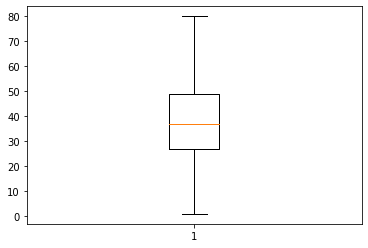

В 2 классе средний возраст составляет 29.87763005780347


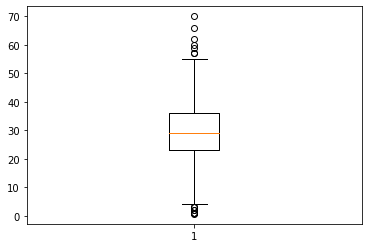

В 3 классе средний возраст составляет 25.14061971830986


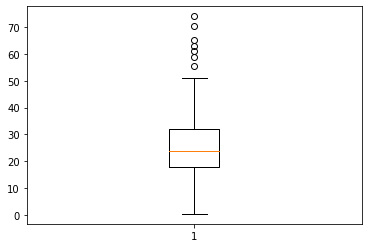

В случае применения двухвыборочного критерия для независимых выборок необходимо 
соблюдение условия равенства дисперсий: https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0
Для 3 и 1 классов нельзя провести t-test:
дисперсия 3 класса 156.1349764510225 
дисперсия 1 класса 219.12454269107815
Для 1 и 2 классов нельзя провести t-test:
дисперсия 1 класса 219.12454269107815 
дисперсия 2 класса 196.0301519088587
Для 2 и 3 классов нельзя провести t-test:
дисперсия 2 класса 196.0301519088587 
дисперсия 3 класса 156.1349764510225


In [54]:
#Сравните средний возраст в классе: можем ли мы считать эти значения равными? Используйте визуализацию, чтобы доказать свою точку зрения.

def Boxplot(x):
    plt.boxplot(x)
    plt.show()

def mean_age_pclass(df):
    pclass, pclass_k = Pclass(df)
    for i in pclass:
        print('В', i, 'классе средний возраст составляет', df.Age[df['Pclass']==i].mean())
        pclass_age = []
        for j in df.Age[df['Pclass']==i]:
            if np.isnan(j)==False:
                pclass_age.append(j)
        Boxplot(pclass_age)
        
mean_age_pclass(df)

# Можем ли мы ответить на этот вопрос с помощью Т-теста? Почему? Здесь вы можете использовать scipy.stats.
# https://coderlessons.com/tutorials/python-technologies/uchitsia-stsipi/scipy-statistika

from scipy import stats
def T_test(a, b):
    if a.var()==b.var():
        print(stats.ttest_ind(list(a),list(b),equal_var = False))
    else:
        print('нельзя провести t-test:\nдисперсия',j,'класса',b.var(),'\nдисперсия',i,'класса',a.var())
    
print('''В случае применения двухвыборочного критерия для независимых выборок необходимо 
соблюдение условия равенства дисперсий: https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0''')    
b = df.Age[(df['Pclass']==pclass[len(pclass)-1]) & ((np.isnan(df['Age'])==False))]
j = len(pclass)
for i in pclass:
    print('Для', j, 'и', i, 'классов ',end='')
    a = df.Age[(df['Pclass']==i) & ((np.isnan(df['Age'])==False))]
    T_test(a, b)
    b, j = a, i

**Task 3. [2 points]**

Use `plt.subplots` to create side-by-side histograms of distributions:
- columns: 3 classes
- rows: age, fare, sex, survival rate

The output is 4 by 3 table.

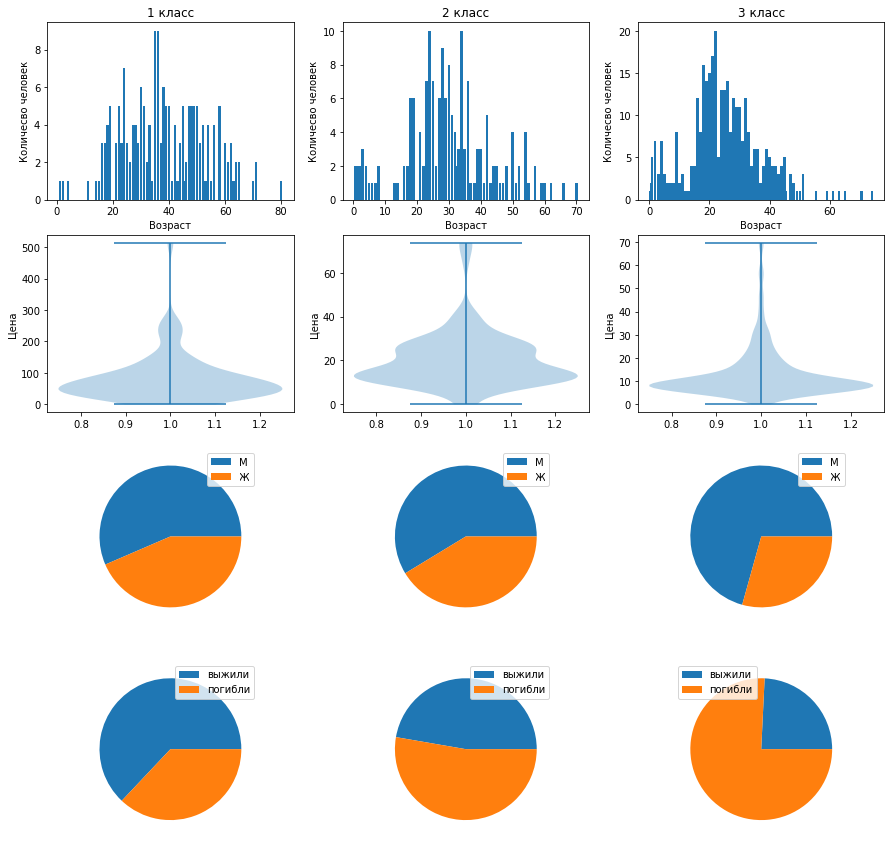

In [55]:
def Bigplt(df):
    fig, axs = plt.subplots(4, 3)
    fig.set_figwidth(15)          
    fig.set_figheight(15)       
    pclass, pclass_k = Pclass(df)
    
    for i in pclass:
        x = list(set(df.Age[(np.isnan(df['Age'])==False) & (df['Pclass']==i)]))
        y = []
        for j in x:
            y.append(len(df[(df['Age']==j) & (df['Pclass']==i)]))
        axs[0, int(i)-1].set(title = str(i)+' класс')
        axs[0, int(i)-1].bar(x, y)
        #axs[0, int(i)-1].plot(y,z,"o")
        axs[0, int(i)-1].set_xlabel('Возраст')             
        axs[0, int(i)-1].set_ylabel('Количесво человек')

    for i in pclass:
        axs[1, int(i)-1].violinplot(df.Fare[df['Pclass']==i])
        axs[1, int(i)-1].set_ylabel('Цена')

    for i in pclass:
        x = []
        #axs[2, int(i)-1].set(title = str(i)+' класс')
        x.append(len(df[(df['Pclass']==i) & (df['Sex']=='male')])/len(df[df['Pclass']==i]))
        x.append(len(df[(df['Pclass']==i) & (df['Sex']=='female')])/len(df[df['Pclass']==i]))
        axs[2, int(i)-1].pie(x)
        axs[2, int(i)-1].legend(['М','Ж'])

    for i in pclass:
        x = []
        x.append(len(df[(df['Pclass']==i) & (df['Survived']==1)])/len(df[df['Pclass']==i]))
        x.append(len(df[(df['Pclass']==i) & (df['Survived']==0)])/len(df[df['Pclass']==i]))
        axs[3, int(i)-1].pie(x)
        axs[3, int(i)-1].legend(['выжили','погибли'])    

    plt.show()
    
Bigplt(df)

**Task 4. [1 point]**

Find 5 most common surnames in passenger list. Try to use `pandas.Series.apply` and lambda-function to extract surnames.

In [56]:
#Найдите 5 самых распространенных фамилий в списке пассажиров. Попробуйте использовать pandas.Series.apply и лямбда-функцию для извлечения фамилий.
series = pd.Series(df.Name).apply(lambda s: s[:s.index(','):])
surname = series.value_counts()
print('\nНаиболее часто встречающиеся фамилии\nФамилия\t\tЧастота\n',surname[0:5],sep='')


Наиболее часто встречающиеся фамилии
Фамилия		Частота
Andersson    9
Sage         7
Skoog        6
Johnson      6
Goodwin      6
Name: Name, dtype: int64


**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.
1. Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2. Suggest some better options to handle missing values in the data and check if it distorts the statistics.

Прочитано записей -  183


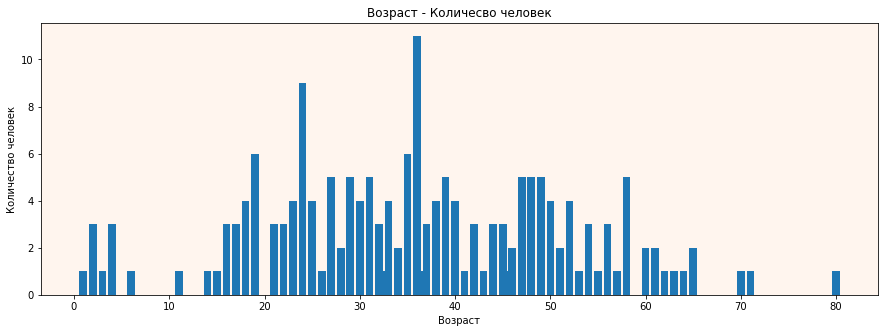

Средний возраст =  35.6744262295082

Пол:	Количесво человек
female	88
male	95


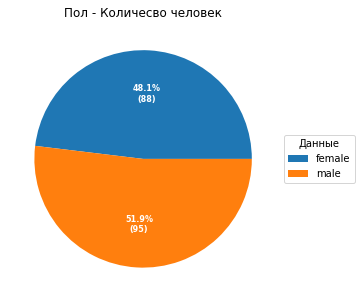


Класс	Количесво человек
1	158
2	15
3	10


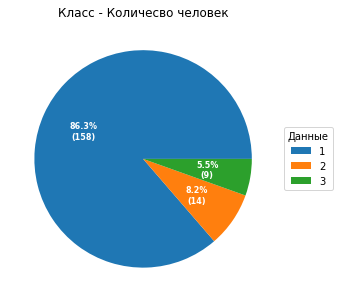

 Barkworth, Mr. Algernon Henry Wilson самый старший пассажир в 1 классе( 80.0 лет)
 Allison, Master. Hudson Trevor самый молодой пассажир в 1 классе ( 0.92 лет)
 Mack, Mrs. (Mary) самый старший пассажир в 2 классе( 57.0 лет)
 Becker, Master. Richard F самый молодой пассажир в 2 классе ( 1.0 лет)
 Humblen, Mr. Adolf Mathias Nicolai Olsen самый старший пассажир в 3 классе( 42.0 лет)
 Strom, Miss. Telma Matilda самый молодой пассажир в 3 классе ( 2.0 лет)

В 1 классе выжило 106 пассажиров из 158 что составляет 67.08860759493672 %
В 2 классе выжило 12 пассажиров из 15 что составляет 80.0 %
В 3 классе выжило 5 пассажиров из 10 что составляет 50.0 %

В возрасте от 0 до 10 лет выжило 8 пассажиров из 10 что составляет 80.0 %
В возрасте от 10 до 15 лет выжило 2 пассажиров из 2 что составляет 100.0 %
В возрасте от 15 до 30 лет выжило 40 пассажиров из 53 что составляет 75.47169811320755 %
В возрасте от 30 до 50 лет выжило 56 пассажиров из 82 что составляет 68.29268292682927 %
В возрасте от 50 до 

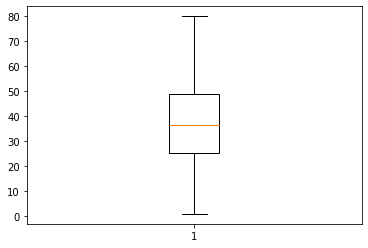

В 2 классе средний возраст составляет 25.266666666666666


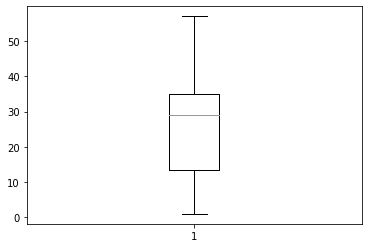

В 3 классе средний возраст составляет 21.0


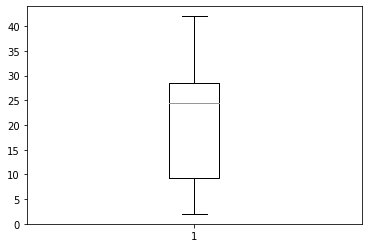

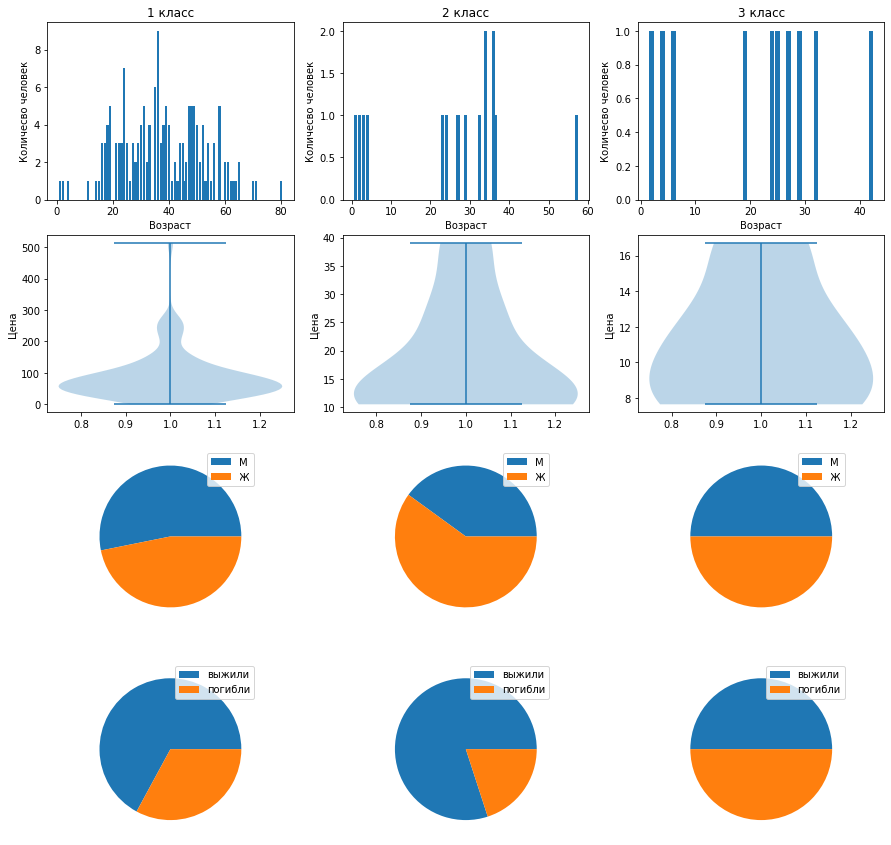

In [57]:
#1 - Пропустите все строки, содержащие пропущенные значения. Правдоподобен ли результат? 
#    Как этот метод влияет на количество данных и значений из Task 1 (возрастные гистограммы, выживаемость и т. Д.?)
df = df.dropna() # ПОЧИСТИТЬ ВСЕ NAN
print('Прочитано записей - ', len(df))
age, age_k, sred = Age(df)
Subplots('Возраст - Количесво человек', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст = ', sred)
sex, sex_k = Sex(df)
print('\nПол:\tКоличесво человек')
[print(sex[i],sex_k[i],sep='\t') for i in range(len(sex))]
Pie('Пол - Количесво человек', sex, sex_k)
pclass, pclass_k = Pclass(df)
print('\nКласс\tКоличесво человек')
[print(pclass[i], pclass_k[i], sep='\t') for i in range(len(pclass))]
Pie('Класс - Количесво человек', pclass, pclass_k)
max_min_age(df)
print()
Survived(df)
print()
mean_age_pclass(df)
Bigplt(df)

Результат после чистки стал не правдоподобен. 
До удаления всех строк с nan число записей составляло - 891, после удаления - 183.
Повысился показатель среднего возраста (с 29 до 37), число мужчин и женщин почти сравнялось (хотя до этого число мужчин почти в два раза привышало число женщин), а преобладающим классом (по числу пассажиров) стал первый класс (был третий). Значительно изменились гистограммы.

#2 - Предложите несколько лучших вариантов обработки отсутствующих значений в данных и проверьте, не искажает ли это статистику.
Возможная обработка отсутствующих значений:
- заполнение пропусков нулями
- заполнение медианой
- заполнение средним арифметическим значением
- заполнение модой
- введение индикаторных переменных
- как-то восстановить недостающие данные на основе других?

In [58]:
df = passengers_record.merge(survival_info)
nans = df.loc[:, df.isnull().any()].copy()
print('Столбики, которые содержат nan: \n', nans.head(0))

Столбики, которые содержат nan: 
 Empty DataFrame
Columns: [Age, Cabin, Embarked]
Index: []


Cabin и Embarked не числовые величины.
Проверю только как отобразится статистика только на возрасте.

Медиана Age =  28.0
Cредний Age =  29.69911764705882


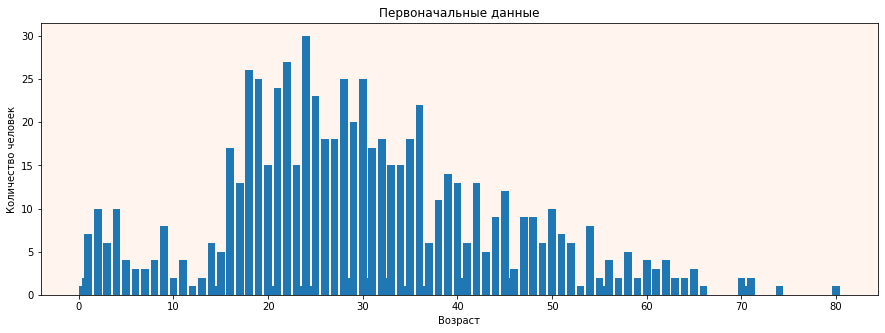

Средний возраст:  29.69911764705882


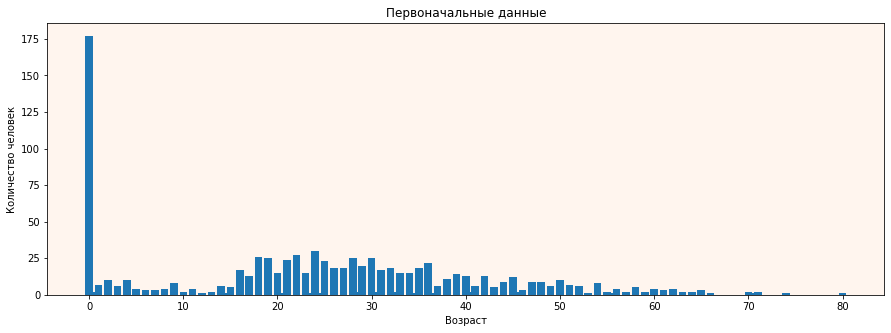

Средний возраст:  23.79929292929293


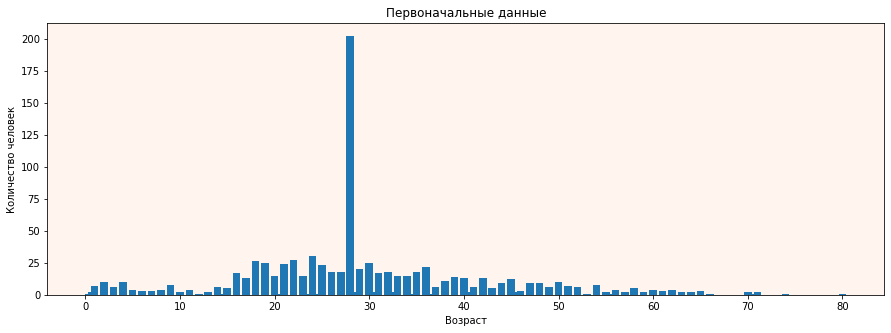

Средний возраст:  29.36158249158249


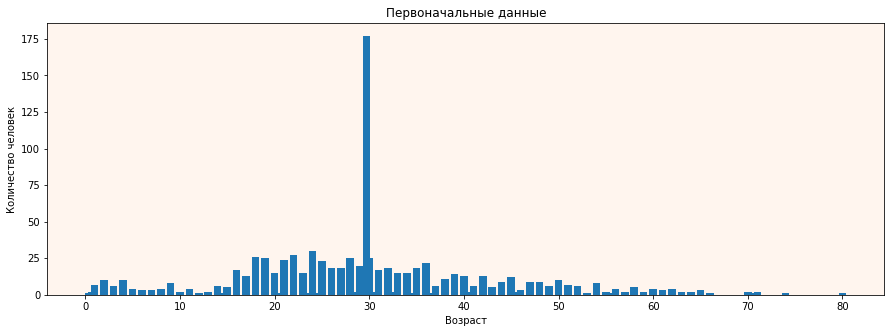

Средний возраст:  29.69911764705882


In [59]:
#заменим все nan нулями
df0 = passengers_record.merge(survival_info)
df0 = df0.fillna(0)

#заменим все nan медианами
df_med = passengers_record.merge(survival_info)
age_med =  df_med.Age.median()
print('Медиана Age = ',age_med)
df_med.Age = df_med.Age.fillna(age_med)

#заменим все nan средним арифметическим
df_mean = passengers_record.merge(survival_info)
age_mean =  df_mean.Age.mean()
print('Cредний Age = ',age_mean)
df_mean.Age = df_mean.Age.fillna(age_mean)

age, age_k, sred = Age(df)
Subplots('Первоначальные данные', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст: ', sred)
age, age_k, sred = Age(df0)
Subplots('Первоначальные данные', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст: ', sred)
age, age_k, sred = Age(df_med)
Subplots('Первоначальные данные', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст: ', sred)
age, age_k, sred = Age(df_mean)
Subplots('Первоначальные данные', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст: ', sred)




На гистограмме видны большие скачки в местах, где nan заменялся каким-либо значением (игнорируя скачки остальное не поменялось). При замене nan нулем изменился значительно средний возраст. 

In [60]:
max_min_age(df)
print('-'*50)
max_min_age(df0)
print('-'*50)
max_min_age(df_med)
print('-'*50)
max_min_age(df_mean)
print('-'*50)

 Barkworth, Mr. Algernon Henry Wilson самый старший пассажир в 1 классе( 80.0 лет)
 Allison, Master. Hudson Trevor самый молодой пассажир в 1 классе ( 0.92 лет)
 Mitchell, Mr. Henry Michael самый старший пассажир в 2 классе( 70.0 лет)
 Hamalainen, Master. Viljo самый молодой пассажир в 2 классе ( 0.67 лет)
 Svensson, Mr. Johan самый старший пассажир в 3 классе( 74.0 лет)
 Thomas, Master. Assad Alexander самый молодой пассажир в 3 классе ( 0.42 лет)
--------------------------------------------------
 Barkworth, Mr. Algernon Henry Wilson самый старший пассажир в 1 классе( 80.0 лет)
    Spencer, Mrs. William Augustus (Marie Eugenie)
                                 Woolner, Mr. Hugh
                             Stewart, Mr. Albert A
            Chibnall, Mrs. (Edith Martha Bowerman)
                               Baumann, Mr. John D
                             Rood, Mr. Hugh Roscoe
                    Thorne, Mrs. Gertrude Maybelle
                             Cairns, Mr. Alexander
     

При замене nan нулем становиться очень много "самых младших пассажиров" с возрастом 0

In [61]:
Survived(df)
print('-'*50)
Survived(df0)
print('-'*50)
Survived(df_med)
print('-'*50)
Survived(df_mean)

В 1 классе выжило 136 пассажиров из 216 что составляет 62.96296296296296 %
В 2 классе выжило 87 пассажиров из 184 что составляет 47.28260869565217 %
В 3 классе выжило 119 пассажиров из 491 что составляет 24.236252545824847 %

В возрасте от 0 до 10 лет выжило 38 пассажиров из 62 что составляет 61.29032258064516 %
В возрасте от 10 до 15 лет выжило 7 пассажиров из 16 что составляет 43.75 %
В возрасте от 15 до 30 лет выжило 111 пассажиров из 306 что составляет 36.27450980392157 %
В возрасте от 30 до 50 лет выжило 107 пассажиров из 256 что составляет 41.796875 %
В возрасте от 50 до 65 лет выжило 26 пассажиров из 63 что составляет 41.269841269841265 %
В возрасте от 65 до 80 лет выжило 0 пассажиров из 10 что составляет 0.0 %

Выжило 233 female из 314 что составляет 74.20382165605095 %
Выжило 109 male из 577 что составляет 18.890814558058924 %
--------------------------------------------------
В 1 классе выжило 136 пассажиров из 216 что составляет 62.96296296296296 %
В 2 классе выжило 87 пасса

При замене nan нулем выживаемость поменялась в возрастной группе от 0 до 10 лет (уменьшилась почти в 2 раза)
Незначительно изменилась в интревале от 15 до 30 лет при замене nan средним и медианой.

Могу сделать вывод, что замена nan нулем - плохой вариант. Куда лучше среднее или медиана, но "скачки" слишком бросаются и явно с ними при дальнейшей обработке будут проблемы.

### Great! Don't forget to submit before the deadline :)

Можно попробовать восстановить данные с помощью линейной регрессии.

Попробуем найти наиболее зависимые столбики
Рассмотрим:
- Возраст - Класс
- Возраст - Выживаемость

 Так как очевидно, что возраст не будет зависеть ни от имени, ни от кабины и тп

In [62]:
df = df.dropna() #чистим все nan
print('Возраст - Класс\n',np.corrcoef(df.Age, df.Pclass))
#print('Возраст - Пол\n',np.corrcoef(df.Age, df.Sex))
print('Возраст - Выживаемость\n',np.corrcoef(df.Age, df.Survived))

Возраст - Класс
 [[ 1.         -0.30651426]
 [-0.30651426  1.        ]]
Возраст - Выживаемость
 [[ 1.         -0.25408475]
 [-0.25408475  1.        ]]


Данные между собой не коррелируют

KNN (K Ближайшие соседи)

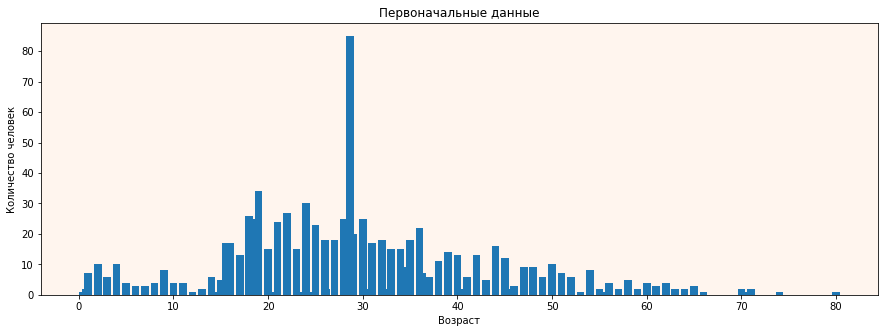

Средний возраст:  29.242633948633276


In [66]:
#Класс, Пол, Выживаемость
#print(df.head(0))
df_all = passengers_record.merge(survival_info)
for i in df_all.PassengerId[np.isnan(df_all['Age'])==True]:#бегаем по незаполненным по ключу
    #Теперь найдем всех "соседей" среди заполненных
    person = df_all.iloc[i-1]    
    sosedi = df[(df['Pclass']==person.Pclass)&(df['Sex']==person.Sex)&(df['Survived']==person.Survived)]
    age_mean = sosedi.Age.mean()
    df_all['Age'].iloc[i-1] = age_mean
age, age_k, sred = Age(df_all)
Subplots('Первоначальные данные', 'Возраст', 'Количество человек', age, age_k)
print('Средний возраст: ', sred)    

http://www.machinelearning.ru/wiki/images/9/90/Kayumov_course_work_imputer_methods.pdf

"Выброс" среднего возраста все равно остался. Скорее всего нужно больше зависимостей, чтобы можно было более адекватно заполнить nanы.